<h1>data loading 

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, datasets, utils
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
print("Loading MNIST Data...")
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 2. Preprocessing
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN: (28, 28, 1) - explicit channel dimension required
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

# One-hot encode the labels (targets)
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

print("Data loaded and preprocessed.")

/Users/adityakumar/Desktop/miniconda3/envs/DL/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Loading MNIST Data...
Data loaded and preprocessed.


In [4]:
def build_cnn(activation='relu', dropout_rate=0.25, optimizer_name='adam'):
    """
    Builds the CNN based on the Base Architecture [cite: 10-14]
    """
    model = models.Sequential()
    # Conv2D Layer 1: 32 filters, 3x3 kernel
    model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
    # Conv2D Layer 2: 64 filters, 3x3 kernel
    model.add(layers.Conv2D(64, (3, 3), activation=activation))
    # Max Pooling Layer: 2x2 kernel
    model.add(layers.MaxPooling2D((2, 2)))
    # Dropout Layer
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))
    # Flatten & Dense Layer (Fully Connected)
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activation))
    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    
    # Configure Optimizer
    if optimizer_name == 'sgd':
        opt = optimizers.SGD(learning_rate=0.01)
    elif optimizer_name == 'sgd_momentum':
        opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
    else:
        opt = 'adam'

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_mlp(hidden_layers=[256, 128], use_bn=True, dropout_rate=0.0, activation='relu', optimizer_name='adam'):
    """
    Builds the MLP based on the Base Architecture [cite: 15-24]
    """
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    for neurons in hidden_layers:
        model.add(layers.Dense(neurons))
        if use_bn:
            model.add(layers.BatchNormalization()) 
        model.add(layers.Activation(activation))   
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
            
    model.add(layers.Dense(10, activation='softmax')) 
    
    # Configure Optimizer
    if optimizer_name == 'sgd':
        opt = optimizers.SGD(learning_rate=0.01)
    else:
        opt = 'adam'

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_history(histories, title):
    """ Helper to plot multiple training histories """
    plt.figure(figsize=(10, 4))
    for name, hist in histories.items():
        plt.plot(hist.history['val_accuracy'], label=name)
    plt.title(f'{title} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

Training models to generate plot data...


/Users/adityakumar/Desktop/miniconda3/envs/DL/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-19 13:11:24.283232: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2026-01-19 13:11:24.283294: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2026-01-19 13:11:24.283304: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2026-01-19 13:11:24.283558: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-19 13:11:24.283610: I tensorflow/core/common_runtime/pluggable_device/pluggab

Training ReLU Model...
Epoch 1/3


2026-01-19 13:11:25.173666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.9589 - loss: 0.1395 - val_accuracy: 0.9787 - val_loss: 0.0704
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9720 - loss: 0.2142 - val_accuracy: 0.9729 - val_loss: 0.4389
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9666 - loss: 2.0318 - val_accuracy: 0.9707 - val_loss: 3.5657
Training Tanh Model...
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9579 - loss: 0.1391 - val_accuracy: 0.9774 - val_loss: 0.0759
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9801 - loss: 0.0661 - val_accuracy: 0.9792 - val_loss: 0.0660
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9830 - loss: 0.0545 - val_accuracy: 0.9773 - val_loss: 0.0733
Plotting results...


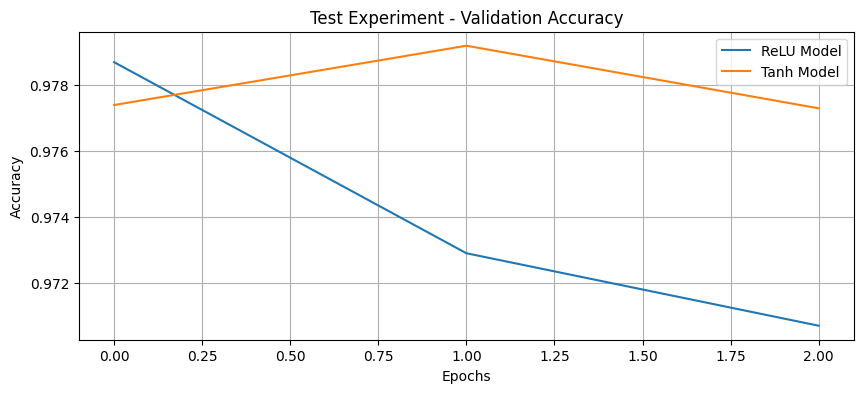

In [5]:
import matplotlib.pyplot as plt

# 1. Create a dictionary to store the training history
print("Training models to generate plot data...")
experiment_data = {}

# 2. Train a sample model (e.g., CNN with ReLU)
# Note: We use the functions you defined above
model_relu = build_cnn(activation='relu', optimizer_name='adam')
print("Training ReLU Model...")
history_relu = model_relu.fit(x_train_cnn, y_train, epochs=3, validation_data=(x_test_cnn, y_test), verbose=1)
experiment_data['ReLU Model'] = history_relu

# 3. Train another model for comparison (e.g., CNN with Tanh)
model_tanh = build_cnn(activation='tanh', optimizer_name='adam')
print("Training Tanh Model...")
history_tanh = model_tanh.fit(x_train_cnn, y_train, epochs=3, validation_data=(x_test_cnn, y_test), verbose=1)
experiment_data['Tanh Model'] = history_tanh

# 4. CALL the plot function to actually see the graph
print("Plotting results...")
plot_history(experiment_data, "Test Experiment")

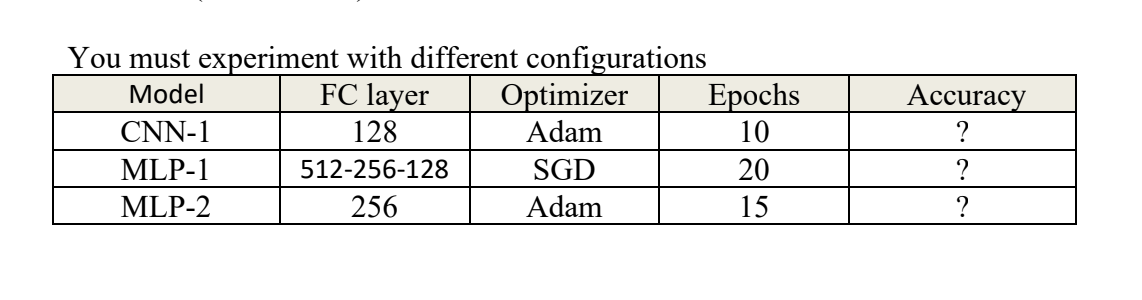

In [6]:
print(">>> RUNNING TABLE EXPERIMENTS <<<")
table_results = []

# 1. CNN-1: FC=128, Adam, 10 Epochs
print("Training CNN-1...")
cnn1 = build_cnn(activation='relu', optimizer_name='adam')
h1 = cnn1.fit(x_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(x_test_cnn, y_test), verbose=1)
table_results.append(["CNN-1", "128", "Adam", 10, h1.history['val_accuracy'][-1]])

# 2. MLP-1: FC=512-256-128, SGD, 20 Epochs
print("\nTraining MLP-1...")
mlp1 = build_mlp(hidden_layers=[512, 256, 128], optimizer_name='sgd', use_bn=True)
h2 = mlp1.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=1)
table_results.append(["MLP-1", "512-256-128", "SGD", 20, h2.history['val_accuracy'][-1]])

# 3. MLP-2: FC=256, Adam, 15 Epochs
print("\nTraining MLP-2...")
mlp2 = build_mlp(hidden_layers=[256], optimizer_name='adam', use_bn=True)
h3 = mlp2.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), verbose=1)
table_results.append(["MLP-2", "256", "Adam", 15, h3.history['val_accuracy'][-1]])

# Print the Table
print("\n" + "="*60)
print(f"{'Model':<10} | {'FC Layer':<15} | {'Opt':<6} | {'Eps':<4} | {'Accuracy':<10}")
print("-" * 60)
for row in table_results:
    print(f"{row[0]:<10} | {row[1]:<15} | {row[2]:<6} | {row[3]:<4} | {row[4]*100:.2f}%")
print("="*60)

>>> RUNNING TABLE EXPERIMENTS <<<
Training CNN-1...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9555 - loss: 0.1453 - val_accuracy: 0.9822 - val_loss: 0.0540
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9787 - loss: 0.0799 - val_accuracy: 0.9824 - val_loss: 0.0612
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9766 - loss: 0.1534 - val_accuracy: 0.9678 - val_loss: 0.3860
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9694 - loss: 1.0111 - val_accuracy: 0.9704 - val_loss: 1.9866
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9677 - loss: 5.2729 - val_accuracy: 0.9743 - val_loss: 7.5913
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9686 - loss: 15.9768 - val_accuracy: 0.9739 - val_loss: 16.7456
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9676 - loss: 37.8758 - val_accuracy: 0.9700 - val_loss: 46.8928
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━

/Users/adityakumar/Desktop/miniconda3/envs/DL/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8843 - loss: 0.4375 - val_accuracy: 0.9451 - val_loss: 0.2020
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9477 - loss: 0.1921 - val_accuracy: 0.9571 - val_loss: 0.1467
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9616 - loss: 0.1412 - val_accuracy: 0.9655 - val_loss: 0.1200
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9701 - loss: 0.1117 - val_accuracy: 0.9707 - val_loss: 0.1036
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9761 - loss: 0.0907 - val_accuracy: 0.9726 - val_loss: 0.0930
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9797 - loss: 0.0768 - val_accuracy: 0.9750 - val_loss: 0.0858
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9828 - loss: 0.0664 - val_accuracy: 0.9769 - val_loss: 0.0804
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9861 - loss: 0.0555 - val_accurac

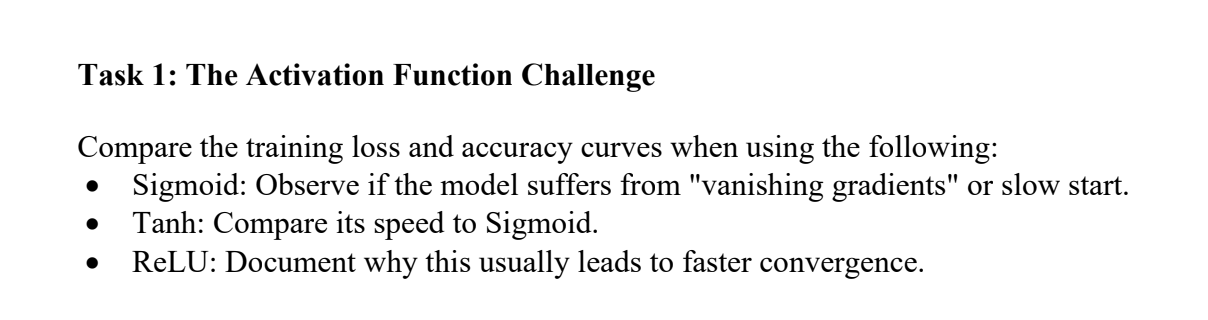

>>> TASK 1: ACTIVATIONS <<<
Testing activation: sigmoid
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.1047 - loss: 2.3228 - val_accuracy: 0.0982 - val_loss: 2.3059
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.3297 - loss: 1.7926 - val_accuracy: 0.9218 - val_loss: 0.2910
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9428 - loss: 0.2026 - val_accuracy: 0.9652 - val_loss: 0.1248
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9732 - loss: 0.0946 - val_accuracy: 0.9787 - val_loss: 0.0710
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9833 - loss: 0.0589 - val_accuracy: 0.9827 - val_loss: 0.0549
Testing activation: tanh
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9531 - loss: 0.1540 - val_accuracy: 0.9779 - val_loss: 0.0729
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9829 - loss: 0.0591 - val_accuracy: 0.9829 - val_loss: 0.0537
Epoch 3/5
938/93

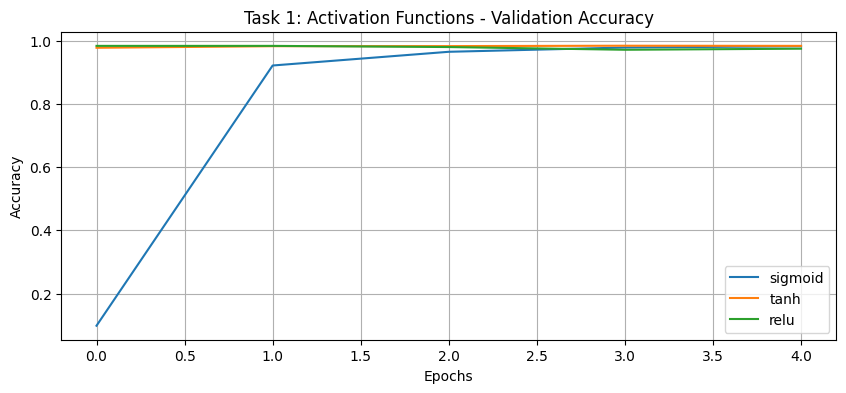

In [8]:
print(">>> TASK 1: ACTIVATIONS <<<")
activations = ['sigmoid', 'tanh', 'relu']
task1_results = {}

for act in activations:
    print(f"Testing activation: {act}")
    # Using CNN base for this test, running for 5 epochs to see convergence speed
    model = build_cnn(activation=act, optimizer_name='adam')
    hist = model.fit(x_train_cnn, y_train, epochs=5, batch_size=64, validation_data=(x_test_cnn, y_test), verbose=1)
    task1_results[act] = hist

plot_history(task1_results, "Task 1: Activation Functions")

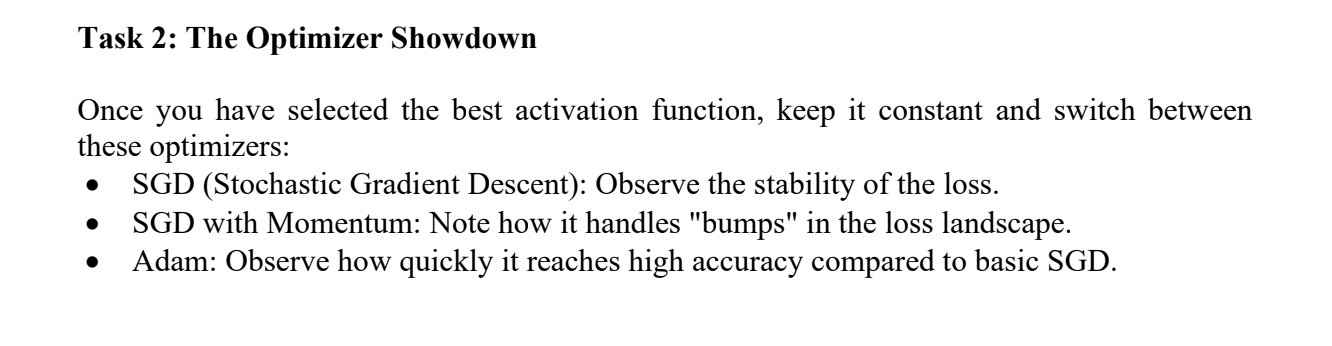

>>> RUNNING TASK 2: OPTIMIZER COMPARISON <<<

--- Testing Optimizer: SGD ---
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8111 - loss: 0.6316 - val_accuracy: 0.9006 - val_loss: 0.3465
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8818 - loss: 0.4608 - val_accuracy: 0.7914 - val_loss: 1.6818
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7877 - loss: 23.7994 - val_accuracy: 0.9290 - val_loss: 0.2755
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9209 - loss: 0.3583 - val_accuracy: 0.9319 - val_loss: 0.3808
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9215 - loss: 0.7610 - val_accuracy: 0.9467 - val_loss: 0.8167

--- Testing Optimizer: SGD with Momentum ---
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8024 - loss: 2.5904 - val_accuracy: 0.8045 - val_loss: 1.4938
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.2114 - loss: 3.0472 - val_accuracy:

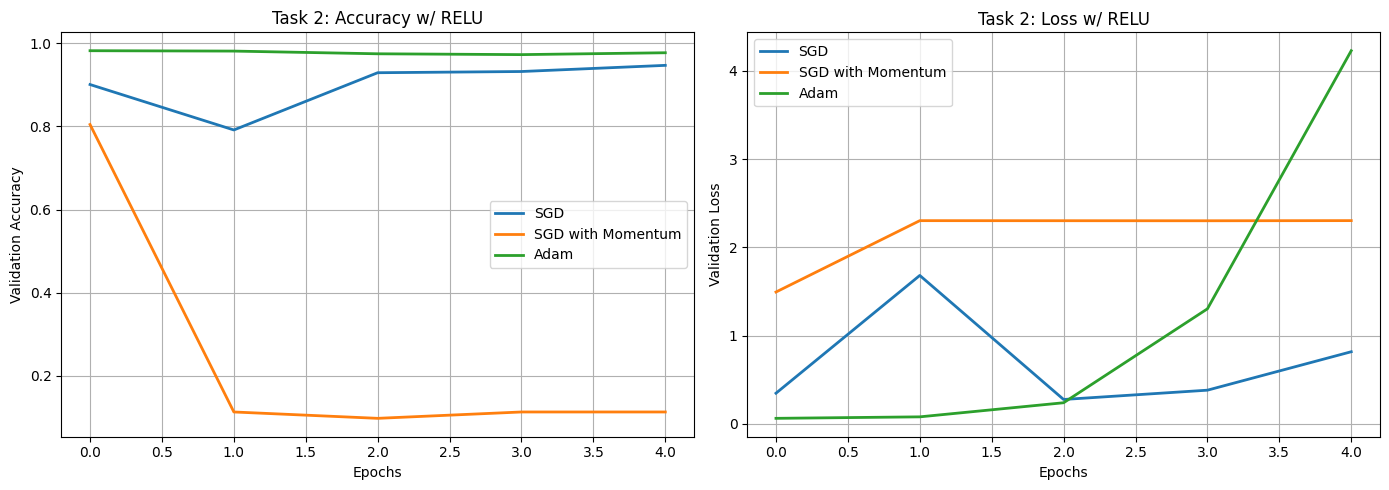

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

# ==========================================
# TASK 2: THE OPTIMIZER SHOWDOWN
# ==========================================
print(">>> RUNNING TASK 2: OPTIMIZER COMPARISON <<<")

# We use ReLU because it was the winner in Task 1
activation_selected = 'relu'

# Define the optimizers to compare
# Note: We create new optimizer instances for each run to ensure a fresh start
optimizer_configs = {
    'SGD': optimizers.SGD(learning_rate=0.01, momentum=0.0),
    'SGD with Momentum': optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': optimizers.Adam(learning_rate=0.001)
}

task2_results = {}

for opt_name, opt_instance in optimizer_configs.items():
    print(f"\n--- Testing Optimizer: {opt_name} ---")
    
    # Build a fresh CNN model for each optimizer
    # We pass the specific optimizer instance to the compile step
    model = build_cnn(activation=activation_selected, optimizer_name='custom') 
    # Note: We need to manually compile here to inject the specific optimizer object
    model.compile(optimizer=opt_instance, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train for 5 epochs (sufficient to see convergence speed differences)
    history = model.fit(
        x_train_cnn, y_train, 
        epochs=5, 
        batch_size=64, 
        validation_data=(x_test_cnn, y_test), 
        verbose=1
    )
    task2_results[opt_name] = history

# ==========================================
# PLOTTING THE RESULTS
# ==========================================
plt.figure(figsize=(14, 5))

# Plot 1: Validation Accuracy
plt.subplot(1, 2, 1)
for name, hist in task2_results.items():
    plt.plot(hist.history['val_accuracy'], label=name, linewidth=2)
plt.title(f'Task 2: Accuracy w/ {activation_selected.upper()}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot 2: Validation Loss
plt.subplot(1, 2, 2)
for name, hist in task2_results.items():
    plt.plot(hist.history['val_loss'], label=name, linewidth=2)
plt.title(f'Task 2: Loss w/ {activation_selected.upper()}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

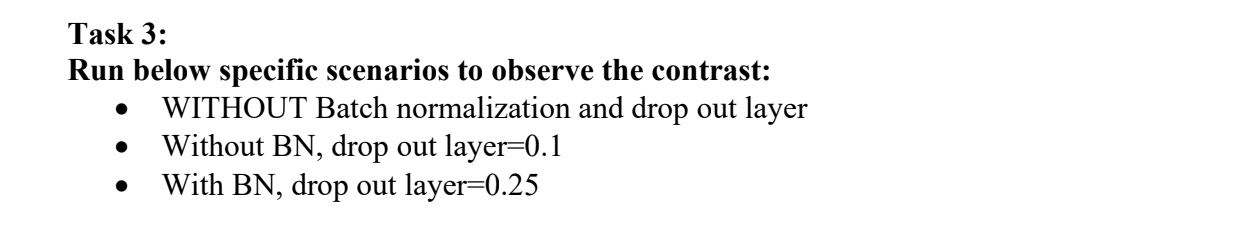

>>> RUNNING TASK 3: ARCHITECTURAL SCENARIOS <<<

--- Scenario A: No BN, No Dropout ---
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8663 - loss: 0.5586 - val_accuracy: 0.8088 - val_loss: 1.2466
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8157 - loss: 2.3977 - val_accuracy: 0.8641 - val_loss: 2.1994
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8039 - loss: 5.9956 - val_accuracy: 0.7786 - val_loss: 9.8191
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7999 - loss: 10.1705 - val_accuracy: 0.8454 - val_loss: 8.2778
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8023 - loss: 15.4077 - val_accuracy: 0.7326 - val_loss: 21.7318
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8010 - loss: 20.2802 - val_accuracy: 0.8566 - val_loss: 14.9510
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7960 - loss: 27.2945 - val_accuracy: 0.8375 - val_loss: 20.0701
Ep

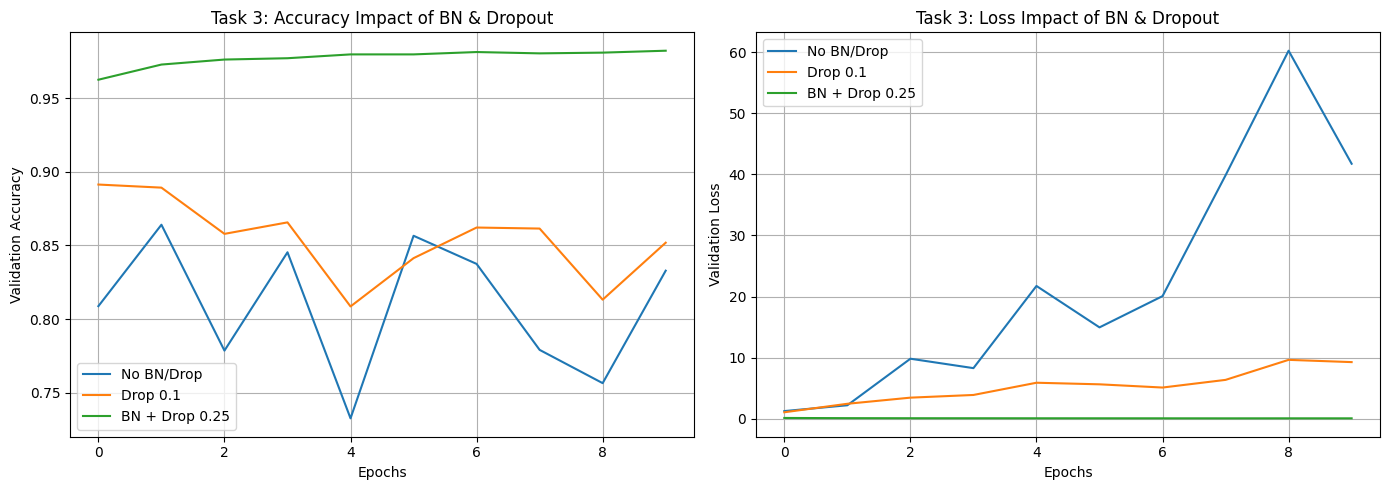

In [10]:
# ==========================================
# TASK 3: BN & DROPOUT SCENARIOS
# ==========================================
print(">>> RUNNING TASK 3: ARCHITECTURAL SCENARIOS <<<")

# We use the MLP builder since the assignment specifies BN/Dropout variations on the MLP structure
# Reference [cite: 37-39]

task3_results = {}

# ---------------------------------------------------------
# Scenario A: WITHOUT Batch Normalization and Dropout
# ---------------------------------------------------------
print("\n--- Scenario A: No BN, No Dropout ---")
model_a = build_mlp(
    hidden_layers=[256, 128], 
    use_bn=False, 
    dropout_rate=0.0,
    optimizer_name='adam' # Using Adam for fair comparison
)
hist_a = model_a.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)
task3_results['No BN/Drop'] = hist_a

# ---------------------------------------------------------
# Scenario B: Without BN, Dropout = 0.1
# ---------------------------------------------------------
print("\n--- Scenario B: No BN, Dropout 0.1 ---")
model_b = build_mlp(
    hidden_layers=[256, 128], 
    use_bn=False, 
    dropout_rate=0.1,
    optimizer_name='adam'
)
hist_b = model_b.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)
task3_results['Drop 0.1'] = hist_b

# ---------------------------------------------------------
# Scenario C: With BN, Dropout = 0.25
# ---------------------------------------------------------
print("\n--- Scenario C: With BN, Dropout 0.25 ---")
model_c = build_mlp(
    hidden_layers=[256, 128], 
    use_bn=True, 
    dropout_rate=0.25,
    optimizer_name='adam'
)
hist_c = model_c.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)
task3_results['BN + Drop 0.25'] = hist_c

# ==========================================
# PLOTTING TASK 3
# ==========================================
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
for name, hist in task3_results.items():
    plt.plot(hist.history['val_accuracy'], label=name)
plt.title('Task 3: Accuracy Impact of BN & Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
for name, hist in task3_results.items():
    plt.plot(hist.history['val_loss'], label=name)
plt.title('Task 3: Loss Impact of BN & Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# ==========================================
# FINAL DELIVERABLE: COMPARISON TABLE
# ==========================================
print(">>> GENERATING FINAL COMPARISON TABLE <<<")

data = []

# 1. Add Task 1 Results (Activation Variations, fixed Optimizer=Adam)
# We assume Task 1 used Adam as the default optimizer
for act_name, history in task1_results.items():
    final_acc = history.history['val_accuracy'][-1] * 100
    data.append({
        "Experiment": "Task 1 (Activation)",
        "Activation": act_name.capitalize(),
        "Optimizer": "Adam", # Default for Task 1
        "Epochs": 5,
        "Final Test Acc": f"{final_acc:.2f}%"
    })

# 2. Add Task 2 Results (Optimizer Variations, fixed Activation=ReLU)
for opt_name, history in task2_results.items():
    final_acc = history.history['val_accuracy'][-1] * 100
    # Avoid duplicate entry for Adam/ReLU if it exists in both
    if opt_name == 'Adam' and any(d['Activation'] == 'Relu' and d['Optimizer'] == 'Adam' for d in data):
        continue
        
    data.append({
        "Experiment": "Task 2 (Optimizer)",
        "Activation": "ReLU", # Fixed for Task 2
        "Optimizer": opt_name,
        "Epochs": 5,
        "Final Test Acc": f"{final_acc:.2f}%"
    })

# Create DataFrame
df = pd.DataFrame(data)
# Reorder columns
df = df[['Experiment', 'Activation', 'Optimizer', 'Epochs', 'Final Test Acc']]

# Display the table
from IPython.display import display
display(df)

>>> GENERATING FINAL COMPARISON TABLE <<<


,Experiment,Activation,Optimizer,Epochs,Final Test Acc
0,Task 1 (Activation),Sigmoid,Adam,5,98.27%
1,Task 1 (Activation),Tanh,Adam,5,98.39%
2,Task 1 (Activation),Relu,Adam,5,97.50%
3,Task 2 (Optimizer),ReLU,SGD,5,94.67%
4,Task 2 (Optimizer),ReLU,SGD with Momentum,5,11.35%


>>> GENERATING FINAL VISUALIZATION <<<


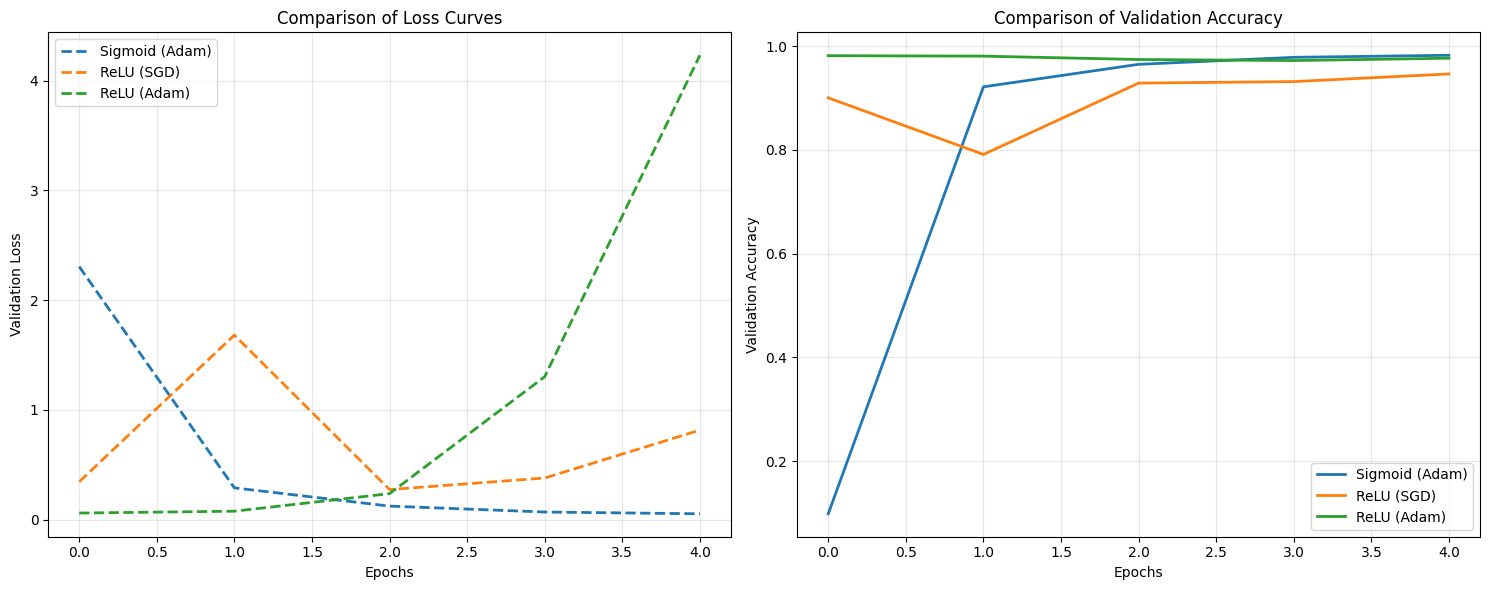

In [12]:
import matplotlib.pyplot as plt

# ==========================================
# FINAL DELIVERABLE: VISUALIZATION
# ==========================================
print(">>> GENERATING FINAL VISUALIZATION <<<")

# Select 3 distinct experiments to compare
# 1. Sigmoid (from Task 1) - Represents "Slow Start"
# 2. SGD (from Task 2) - Represents "Standard/Noisy"
# 3. Adam (from Task 2) - Represents "Fast Convergence"

experiments_to_plot = {
    'Sigmoid (Adam)': task1_results.get('sigmoid'),
    'ReLU (SGD)': task2_results.get('SGD'),
    'ReLU (Adam)': task2_results.get('Adam')
}

plt.figure(figsize=(15, 6))

# --- Plot 1: Loss Curves ---
plt.subplot(1, 2, 1)
for name, history in experiments_to_plot.items():
    if history: # Check if data exists
        plt.plot(history.history['val_loss'], label=name, linewidth=2, linestyle='--')
plt.title('Comparison of Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Plot 2: Accuracy Curves ---
plt.subplot(1, 2, 2)
for name, history in experiments_to_plot.items():
    if history: # Check if data exists
        plt.plot(history.history['val_accuracy'], label=name, linewidth=2)
plt.title('Comparison of Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()